## Cohort Analysis

### Introduction

**Cohort analysis** is a study that focuses on the activities of a particular cohort. A cohort is a group of people who share a common characteristic over a certain period of time. Cohort analysis allows us to study a group of people/users who share the same characteristic, i.e the same sign up month and see how they perform over time.

This dataset contains transactional data from a shop specializing in homebrewing and craft brewing supplies.


### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from operator import attrgetter
import seaborn as sns
import numpy as np

### Loading the Data

In [6]:
dataframe = pd.read_csv('C:/Users/Administrator/Documents/Transactions.csv', delimiter=';')
dataframe

,OrderIds,DateTimeUtc,OrderTotalPrice,OrderLineProductIdsBaseSite,OrderLineProductName,OrderLineQuantity,OrderLineBasePricePerItem,OrderLinePriceOfLine,OrderCustomerIdsMindboxId
0,21610,20.10.2018 19:33,"3800,63",9275,"Дрожжи Mangrove Jack's Belgian Wit M21, 10 г",1,207,207,20
1,21610,20.10.2018 19:33,"3800,63",1437,"Дрожжи Mangrove Jack's US West Coast M44, 10 г",1,207,207,20
2,21610,20.10.2018 19:33,"3800,63",3003,"Дезинфицирующее средство Melkko, 100 мл",1,234,234,20
3,21610,20.10.2018 19:33,"3800,63",1596,Мельница для солода Easy Brew 500,1,1791,1791,20
4,21610,20.10.2018 19:33,"3800,63",14267,"Хмель Lemondrop (США), 50г",1,207,207,20
...,...,...,...,...,...,...,...,...,...
43093,35284,25.07.2019 10:10,"3138,97",2937,"Дрожжи Fermentis Safale S-04, 11,5 г",2,220,440,91103
43094,35284,25.07.2019 10:10,"3138,97",2878,"Солод Венский (Курский Солод), 9 кг",2,490,980,91103
43095,35284,25.07.2019 10:10,"3138,97",9431,"Солод Пилсен (Курский Солод), 9 кг",1,439,439,91103
43096,35284,25.07.2019 10:10,"3138,97",1140,"Хмель Saaz (Жатецкий) (Чехия), 100 г",2,277,554,91103


From the table structure shown above, we can see a denormalized schema. This table combines both order-level and line-item-level information into a single structure.

Each row represents a line item (a specific product in the order), and the order-level data, such as **OrderTotalPrice**, is repeated for each product within the same order.

In [8]:
# Define a new dataframe where we use the columns needed for Cohort Analysis
df = dataframe[['OrderIds', 'DateTimeUtc', 'OrderTotalPrice', 'OrderCustomerIdsMindboxId']]
df

,OrderIds,DateTimeUtc,OrderTotalPrice,OrderCustomerIdsMindboxId
0,21610,20.10.2018 19:33,"3800,63",20
1,21610,20.10.2018 19:33,"3800,63",20
2,21610,20.10.2018 19:33,"3800,63",20
3,21610,20.10.2018 19:33,"3800,63",20
4,21610,20.10.2018 19:33,"3800,63",20
...,...,...,...,...
43093,35284,25.07.2019 10:10,"3138,97",91103
43094,35284,25.07.2019 10:10,"3138,97",91103
43095,35284,25.07.2019 10:10,"3138,97",91103
43096,35284,25.07.2019 10:10,"3138,97",91103


There are some duplicates since the original table had the order lines and the total order price combined, which causes duplication.

### Data Inspection

In [11]:
# Checking for missing data
missing_data = df.isnull().sum()

# Display columns with missing data
print("Missing data in columns:")
print(missing_data[missing_data > 0])

Missing data in columns:
Series([], dtype: int64)


In [12]:
# Print information about the DataFrame - quality of data & non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43098 entries, 0 to 43097
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   OrderIds                   43098 non-null  int64 
 1   DateTimeUtc                43098 non-null  object
 2   OrderTotalPrice            43098 non-null  object
 3   OrderCustomerIdsMindboxId  43098 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [13]:
# Return a statistically description of the data - numerical columns
df.describe()

,OrderIds,OrderCustomerIdsMindboxId
count,43098.000000,43098.000000
mean,22789.320386,48865.435009
std,7710.859481,15464.597131
min,5.000000,20.000000
25%,16122.000000,41504.000000
50%,23178.000000,51135.000000
75%,29204.000000,55458.000000
max,36005.000000,91103.000000


### Data Processing

In [15]:
# Remove duplicates in a column
df = df.drop_duplicates(subset=['OrderIds']).reset_index(drop=True)

In [16]:
# Rename columns
cols = ['order_id', 'date', 'order_total_price', 'customer_id']

df.columns = cols
df

,order_id,date,order_total_price,customer_id
0,21610,20.10.2018 19:33,"3800,63",20
1,29383,17.03.2019 6:21,"2118,5",20
2,9861,01.03.2018 17:26,6042,1923
3,12842,07.05.2018 15:06,2660,2096
4,11127,29.03.2018 8:20,"1654,71",2156
...,...,...,...,...
7414,33859,24.06.2019 12:46,4248,90685
7415,26778,27.01.2019 12:12,"7640,5",90741
7416,30254,01.04.2019 20:51,2485,90793
7417,32265,17.05.2019 17:17,"2558,77",91103


In [17]:
# Convert revenue data to numeric, and replace commas with dots (if necessary)
df['order_total_price'] = df['order_total_price'].str.replace(',', '.').astype(float)

# Convert string column Date into Python Date time object
df['date'] = pd.to_datetime(df['date'])

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_3824\2805764543.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [18]:
# Extract the month and year from the Date column and create a new column
df['order_period'] = df['date'].dt.to_period('M')

### Cohort Analysis

#### Creating the cohort for each customer - first purchase

In [21]:
# Group orders by customers and find the first purchase date (cohort month) for each customer
df['cohort_month'] = df.groupby('customer_id')['date'].transform('min').dt.to_period('M')

#### Calculating cohort index - months since first purchase

In [25]:
# Calculate how many months have passed since the customer’s first purchase
df['cohort_index'] = (df['order_period'] - df['cohort_month']).apply(attrgetter('n'))

#### 1. Analyzing Cohort Retention

**Cohort retention** is a measure of how well a group of people continues to use a product or service over time. It is often used to track the long-term engagement of a group of users who have joined or signed up for a product or service at the same time.

In [29]:
# Count how many unique customers from each cohort make purchases over time
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().unstack()

In [30]:
# Drop two extra cohorts 
cohort_data = cohort_data.drop(['2017-11', '2018-01'], axis=0)

Calculating the **Retention Rate** by dividing the number of active customers in each subsequent month by the number of customers in the first month of each cohort:

In [32]:
# Get the size of each cohort (number of unique customers in the first month)
cohort_sizes = cohort_data.iloc[:, 0]

# Calculate retention by dividing each column by the first column (Month 0)
retention = cohort_data.divide(cohort_sizes, axis=0)

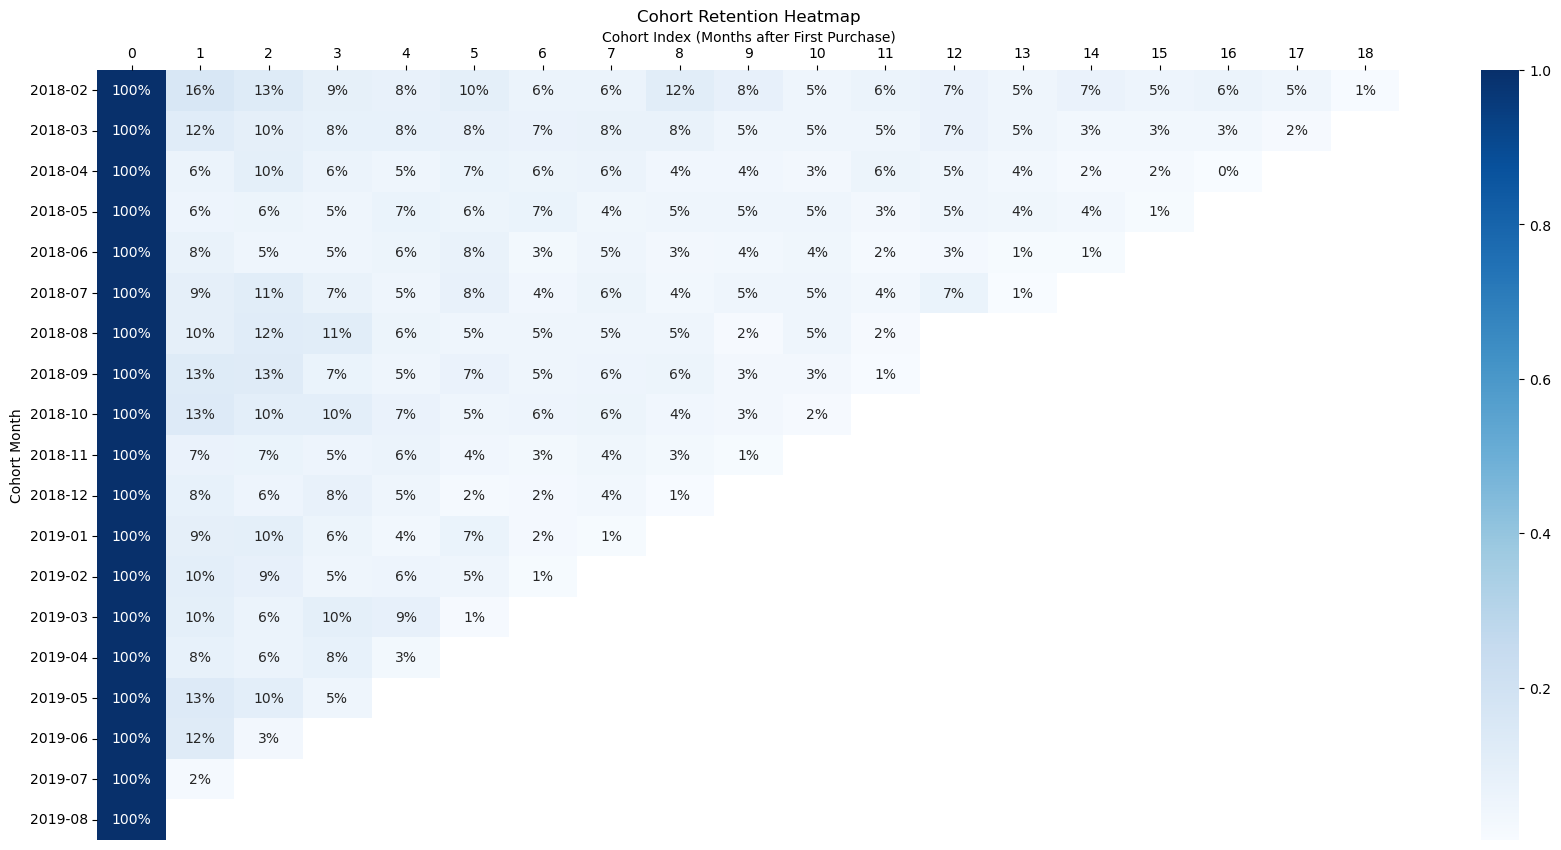

In [33]:
# Plot the retention heatmap
plt.figure(figsize=(21, 10))
x = sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Heatmap')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months after First Purchase)')

# Move the X-axis to the top
x.xaxis.set_label_position('top')  # Move the X-axis label to the top
x.xaxis.tick_top()                 # Move the X-axis ticks to the top

plt.show()

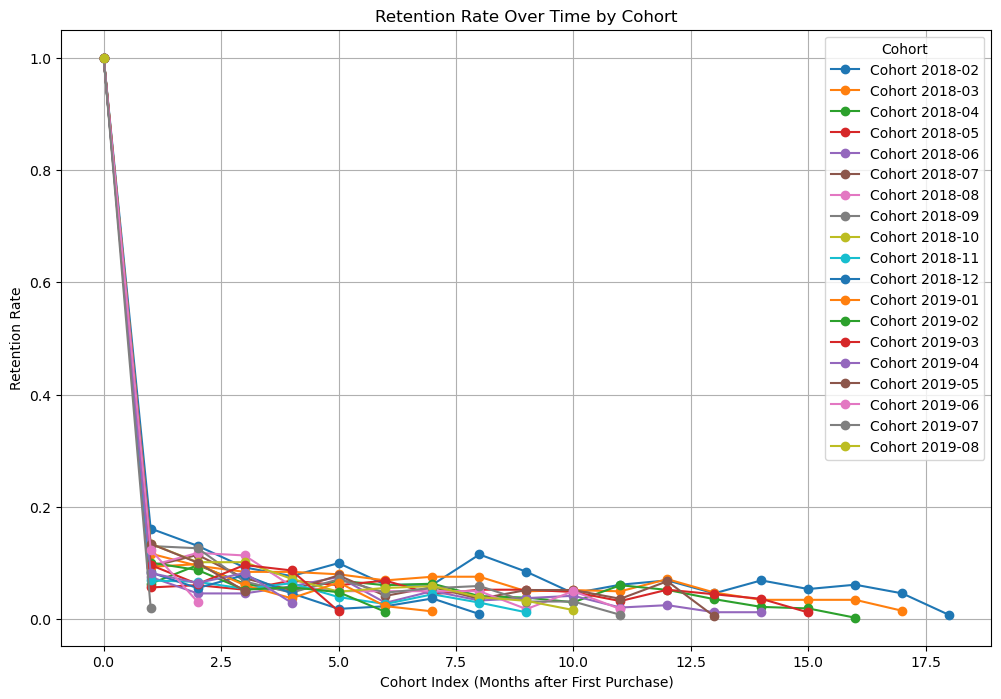

In [34]:
# Plot retention over time for each cohort
plt.figure(figsize=(12, 8))

# Plot a line for each cohort
for cohort in retention.index:
    plt.plot(retention.columns, retention.loc[cohort], marker='o', label=f'Cohort {cohort}')

# Add plot labels and title
plt.title('Retention Rate Over Time by Cohort')
plt.xlabel('Cohort Index (Months after First Purchase)')
plt.ylabel('Retention Rate')
plt.legend(title='Cohort')
plt.grid(True)
plt.show()

- **Overall Retention Drop:** Most cohorts experience a sharp decline in retention after the first month, indicating that a significant number of customers are not making repeat purchases after their initial engagement. This sharp drop is a common pattern in e-commerce.

- **Cohorts from February 2018:** This cohort (2018-02) stands out with better-than-average retention, maintaining around 12% of its customers by the eighth month. This could be a result of specific marketing efforts, product releases, or seasonal factors that led to stronger customer loyalty or repeated purchases.

- **High Retention in Mid-2019 Cohorts:** The cohorts from July to October 2019 show above-average retention in the first two months. During that period, customers were probably more likely to return and make a second purchase soon after their initial one. The possible investigation would be to check if there were promotional campaigns, product changes, or external factors driving this behavior.

- **Long-term Retention Stability:** After the sixth month, the retention rates across all cohorts stabilize around 5%, indicating that there is probably a core set of loyal customers who continue to engage with the business long-term.

#### 2. Analyzing Revenue by Cohort

In [37]:
# Track how much revenue each cohort generates over time
cohort_revenue = df.groupby(['cohort_month', 'cohort_index'])['order_total_price'].sum().unstack()

In [38]:
# Drop two extra cohorts 
cohort_revenue = cohort_revenue.drop(['2017-11', '2018-01'], axis=0)

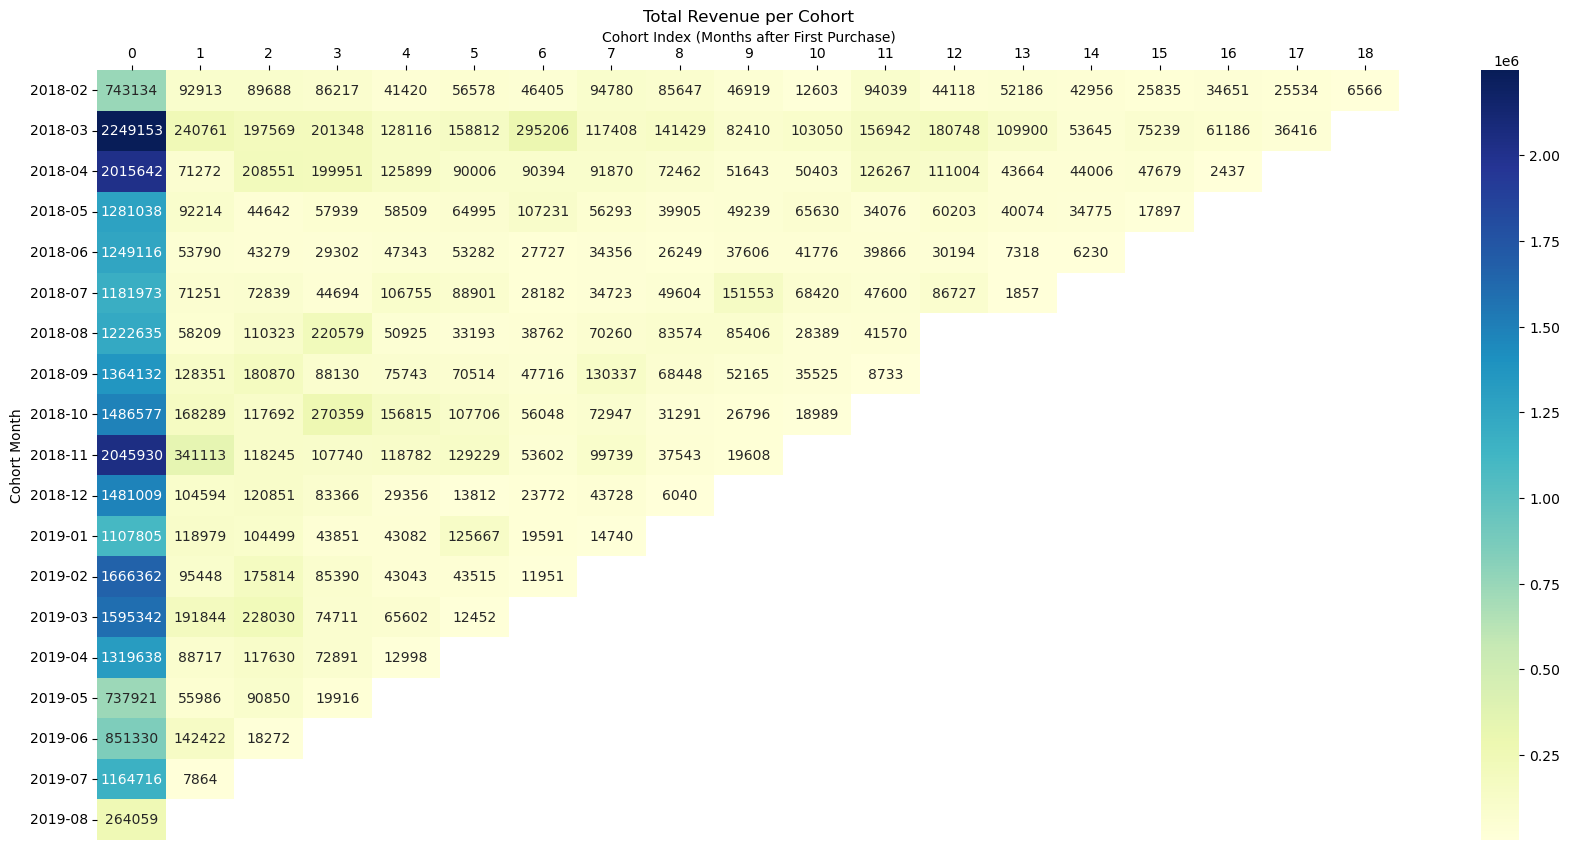

In [39]:
# Plot the cohort revenue heatmap
plt.figure(figsize=(21, 10))
x = sns.heatmap(cohort_revenue, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Revenue per Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months after First Purchase)')

# Move the X-axis to the top
x.xaxis.set_label_position('top')  # Move the X-axis label to the top
x.xaxis.tick_top()                 # Move the X-axis ticks to the top

plt.subplots_adjust(hspace = 88)
plt.show()

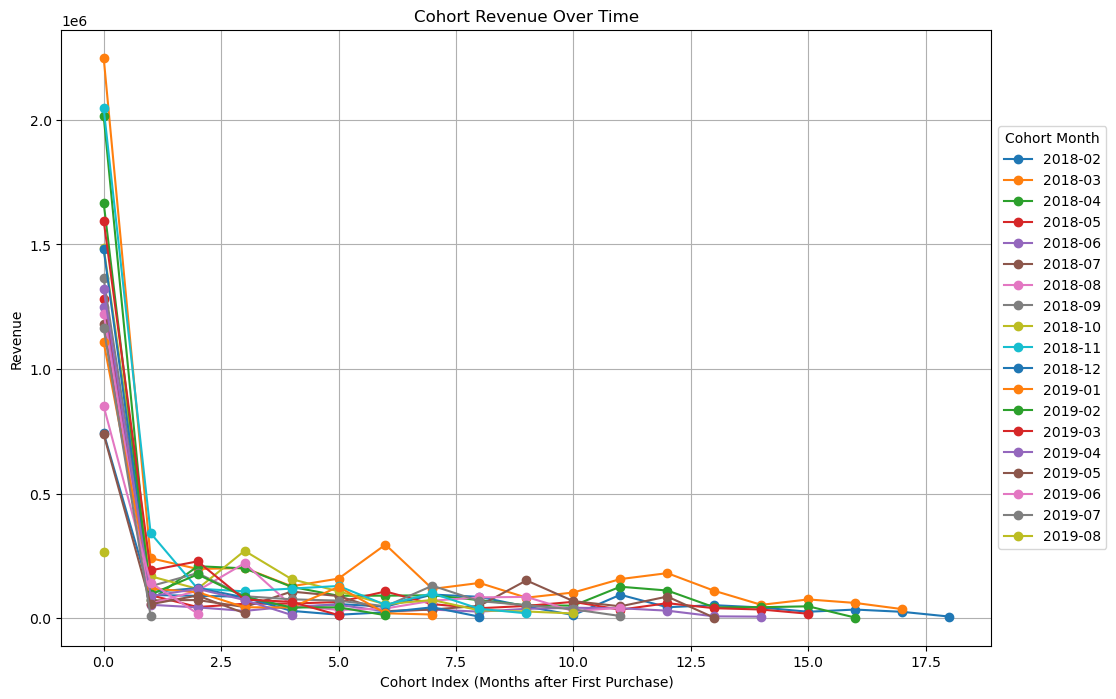

In [40]:
# Plotting total revenue over time for each cohort as a line chart
plt.figure(figsize=(12, 8))

# Iterate through each cohort to plot the revenue change over time
for cohort_month in cohort_revenue.index:
    plt.plot(cohort_revenue.columns, cohort_revenue.loc[cohort_month], marker='o', label=cohort_month)

plt.title('Cohort Revenue Over Time')
plt.xlabel('Cohort Index (Months after First Purchase)')
plt.ylabel('Revenue')
plt.legend(title='Cohort Month', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

- **Highest First Month Revenues:** The March 2018 (2018-03) cohort has the highest revenue in the first month, followed closely by November 2018 (2018-11) and April 2018 (2018-04) cohorts.

- **Holiday Preparation**: The November 2018 (2018-11) cohort had the highest revenue in its second month, which is December, likely boosted by holiday or end-of-year shopping (Black Friday, Christmas, New Year's). This supports the idea of seasonal spikes when people often buy and brew in the fall/winter to have their drinks ready for holiday gatherings. Besides, as temperatures drop, more people turn to hobbies they can do indoors, and brewing becomes an attractive pastime.

- **Spring Months**: The months of March (2018-03, 2019-03) and April (2018-04, 2019-04) have a noticably higher revenues comparing to other months. This trend might be tied to the fact that many homebrewers prefer to brew during cooler months because fermentation can be temperature-sensitive. 